# Aula 4 - Ensembles

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Métodos de Ensembles - Bagging e Boosting
- 2) Random Forest
- 3) Adaboost
- 4) GradientBoosting
- 5) LightGBM
- 6) Curva ROC e ROC-AUC

<img src="https://miro.medium.com/max/899/0*Wy3QjtXL9qf-Ssyz.jpg" width=800>

###  

## Métodos de Ensemble


Há uma classe de algoritmos de Machine Learning, os chamados **métodos de ensemble** que tem como objetivo **combinar as predições de diversos estimadores mais simples** para gerar uma **predição final mais robusta**

Os métodos de ensemble são ainda divididos em duas classes:

- **Métodos de Bagging**: têm como procedimento geral construir diversos estimadores independentes, e tomar a média de suas predições como a predição final. O principal objetivo do método é reduzir variância, de modo que o modelo final seja melhor que todos os modelos individuais. Ex.: **random forest.**

<br>

- **Métodos de Boosting**: têm como procedimento geral a construção de estimadores de forma sequencial, de modo que estimadores posteriores tentam reduzir o viés do estimador conjunto, que leva em consideração estimadores anteriores. Ex.: **adaboost**.

Para mais detalhes, [clique aqui!](https://scikit-learn.org/stable/modules/ensemble.html)

### Random Forest

Uma técnica muito interessante baseada em árvores é o **Random Forest**. Neste modelo, são criadas varias árvores usando uma seleção aleatória de features, e calculado para uma das árvores

<img src="https://i.ytimg.com/vi/goPiwckWE9M/maxresdefault.jpg" width=700>

O modelo de RandomForest utiliza os conceitos de **bootstraping** e **aggregation** (ou então, o procedimento composto **bagging**) para criar um modelo composto que é melhor que uma única árvore!. Vamos explicar cada uma das etapas:<br><br>
- **Bootstraping**: Usando os dados originais, cria-se uma amostra desses dados, que pode haver ou não **repetições**;<br>
- **Aggregation**: Para o bootstrapped dataset, calcula-se diversas árvores diferentes usando seleção aleatória de features para montar as árvores. Então se no nosso dataset tiver 50 features, o modelo vai montar diversas árvores selecionando 10 features aleatoriamente.<br><br>

Para obter a predição no final, no caso de classificadores observa-se qual a classe mais frequente na análise, no caso de regressores retorna a média das respostas das diversas árvores (**SIM** *RandomForest* pode ser aplicada em Regressões).

<img src="https://c.mql5.com/2/33/image1__1.png" width=600>

###  

### Exemplos

Partindo do mesmo exemplo da aula anterior para _Heart Failure_:

In [ ]:
# importe as principais bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# desabilita os warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('./datasets/heart_failure.csv')

In [ ]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
X = df.drop(['DEATH_EVENT'], axis = 1)
y = df['DEATH_EVENT']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42,
                                                    stratify=y)

Obtendo os resultados para o __Decision Tree__:

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Instancie o modelo

model = DecisionTreeClassifier(random_state = 42)

In [ ]:
# Fit do Modelo

model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Predict do Modelo

y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85        61
           1       0.69      0.62      0.65        29

    accuracy                           0.79        90
   macro avg       0.76      0.74      0.75        90
weighted avg       0.78      0.79      0.79        90



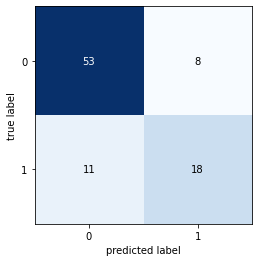

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

###  

Vamos agora dar uma olhada em como implementar o __Random Forest__ e comparar com os resultados do modelo anterior:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(random_state = 42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87        61
           1       0.75      0.62      0.68        29

    accuracy                           0.81        90
   macro avg       0.79      0.76      0.77        90
weighted avg       0.81      0.81      0.81        90



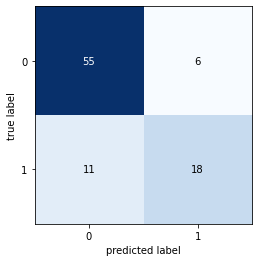

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

###  

### Adaboost

O Adaboost significa **Adaptive Boosting**, e tem como procedimento geral **a criação sucessiva de árvores de um único nó (stumps - modelos fracos) que utiliza dos erros da árvore anterior para melhorar a próxima árvore**. As predições finais são feitas com base **nos pesos de cada stump**, cuja determinação faz parte do algoritmo.


<img src="https://miro.medium.com/max/1744/1*nJ5VrsiS1yaOR77d4h8gyw.png" width=300>

De forma resumida, as principais ideias por trás deste algoritmo são:

- O algoritmo cria e combina um conjunto de **modelos fracos** (em geral, stumps);
- Cada stump é criado **levando em consideração os erros do stump anterior**;
- Alguns dos stumps têm **maior peso de decisão** do que outros na predição final;

<br>

<img src="https://www.researchgate.net/profile/Zhuo_Wang8/publication/288699540/figure/fig9/AS:668373486686246@1536364065786/Illustration-of-AdaBoost-algorithm-for-creating-a-strong-classifier-based-on-multiple.png" width=500>

<img src="https://static.packt-cdn.com/products/9781788295758/graphics/image_04_046-1.png" width=400>

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state = 42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86        61
           1       0.76      0.55      0.64        29

    accuracy                           0.80        90
   macro avg       0.79      0.73      0.75        90
weighted avg       0.80      0.80      0.79        90



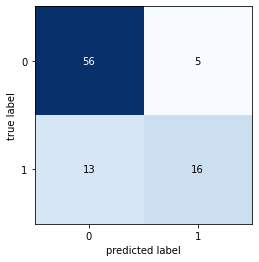

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

## 

## GradientBoosting e XGBoosting

Todos os modelos de _Boosting_ partem da mesma estratégia utilizando árvores mais simples e estimando erros. A principal diferença dos diversos modelos de _Boosting_ que existe são justamente o algoritmo de otimização do modelo.

<br>

No caso de modelos como o __GradientBoosting__, o principal diferencial é justamente utilizar um otimizador através de __gradiente descente__. Conforme o modelo faz uma iteração e cálcula a função de custo do modelo, utiliza-se de gradientes para definir o ajuste necessário na função inicial e repitir o processo iterativo:

<img src="http://rasbt.github.io/mlxtend/user_guide/general_concepts/gradient-optimization_files/ball.png" width=500>

<br>
    
   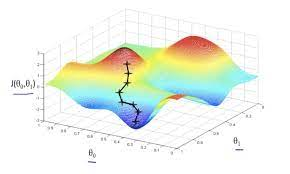

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
clf = GradientBoostingClassifier(random_state = 42)

In [ ]:
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87        61
           1       0.75      0.62      0.68        29

    accuracy                           0.81        90
   macro avg       0.79      0.76      0.77        90
weighted avg       0.81      0.81      0.81        90



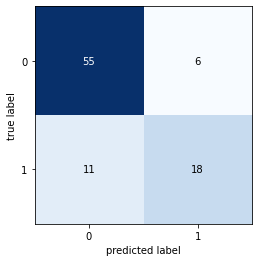

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

No caso do __XGBoost__, o nome significa _Extreme Gradient Boosting_, ou seja ele utiliza de otimizações e uma arquitetura mais robusta para desenvolver resultados mais eficientes e com um custo computacional menor!

<br>

Este modelo junto com o _LightGBM_, são os modelos que dominaram as competições do _Kaggle_, se mostrando com os modelos mais eficientes:

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
clf = XGBClassifier(random_state = 42)

In [ ]:
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

[21:12:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        61
           1       0.74      0.59      0.65        29

    accuracy                           0.80        90
   macro avg       0.78      0.74      0.76        90
weighted avg       0.79      0.80      0.79        90



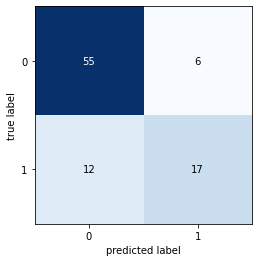

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

Já o caso do __LightGBM__, foi um _framework_ otimizado do _Gradient Boosting_ desenvolvida pela _Microsoft Research_ e que impactou significativamente as competições de _Machine Learning_ com alta performance: 

In [ ]:
!pip install lightgbm

In [ ]:
import lightgbm as lgb

In [ ]:
clf = lgb.LGBMClassifier(random_state = 42)

In [ ]:
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88        61
           1       0.84      0.55      0.67        29

    accuracy                           0.82        90
   macro avg       0.83      0.75      0.77        90
weighted avg       0.83      0.82      0.81        90



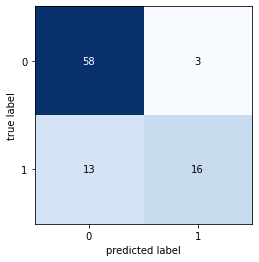

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

###  

## Curva ROC-AUC

Veremos agora uma outra métrica de avaliação de modelos de classificação, que é a **AUC (Area Under The Curve) da curva ROC (Receiver Operating Characteristics)**, por vezes chamada de **AUROC (Area Under the Receiver Operating Characteristics)**

A curva **ROC é uma curva de probabilidade**, sendo que **AUC é a área sob a curva**, representando **o grau de separabilidade atingido pelo modelo**.

Ou seja, esta medida nos diz **o quanto o modelo é capaz de distinguir entre duas classes**.

A curva ROC é construída com a **taxa de falsos positivos** no eixo x, e a **taxa de verdadeiros positivos** no eixo y, para diferentes **thresholds de classificação**:

<img src="https://miro.medium.com/max/1175/1*2nd7NTEBosPakccmLVWy9A.png" width=500>

O valor do AUC-ROC sempre estará **entre 0 e 1**, sendo que **quanto mais próximo de 1, melhor o modelo**.

> Valores de AUC-ROC maiores que 0.5 (mais próximos de 1) significam que o modelo tem uma **taxa de veridadeiros positivos maior que a taxa de falsos positivos**, ou seja, o modelo está acertando mais!

Quanto **mais próximo de 0** (para valores abaixo de 0.5), teremos um modelo que faz um bom trabalho em separar as classes, mas as classifica erroneamente.

E, quanto **mas próximo de 0.5**, pior é o modelo em separar as classes: seria um modelo que simplesmente chuta aleatoriamente ora a classe 0, ora a classe 1. Veja as imagens a seguir para uma ilustração:

<img src="https://miro.medium.com/max/528/1*Uu-t4pOotRQFoyrfqEvIEg.png" width=500>


<img src="https://miro.medium.com/max/507/1*yF8hvKR9eNfqqej2JnVKzg.png" width=500>


<img src="https://miro.medium.com/max/430/1*iLW_BrJZRI0UZSflfMrmZQ.png" width=500>


<img src="https://miro.medium.com/max/556/1*aUZ7H-Lw74KSucoLlj1pgw.png" width=500>

Ao olhar para a curva em si, temos a seguinte interpretação:

<img src="https://i.ytimg.com/vi/J9l8J1MeCbY/hqdefault.jpg" width=400>

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score

def test_models_plot_roc_auc_curve(model_list, col_model_name, col_model, X_train, X_test, y_train, y_test):
    for mdl in model_list:
        model = mdl[col_model]
        model.fit(X_train, y_train)
        y_predict = model.predict(X_test)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
        auc = metrics.roc_auc_score(y_test, model.predict(X_test))
        plt.plot(fpr, tpr, label='%s ROC (AUC = %0.2f)' % (mdl[col_model_name], auc))
        print("Model      : %s" % mdl[col_model_name])
        print("Accuracy   : %0.4f " %  accuracy_score(y_test, y_predict))
        print("Precision  : %0.4f " % precision_score(y_test, y_predict, average='weighted'))
        print("Recall     : %0.4f " % recall_score(y_test, y_predict, average='weighted'))
        print("F1 - Score : %0.4f " % f1_score(y_test, y_predict, average='weighted'))
        print("ROC - AUC  : %0.4f " % auc)
        print("======================")
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-AUC curve')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
random_seed = 42

list_models = [
{'model_name': 'Decision Tree',
 'estimator' : DecisionTreeClassifier(random_state = random_seed)},
{'model_name': 'Random Forest',
 'estimator' : RandomForestClassifier(random_state = random_seed)}, 
{'model_name': 'AdaBoost',
 'estimator' : AdaBoostClassifier(random_state = random_seed)},
{'model_name': 'GradientBoosting',
 'estimator' : GradientBoostingClassifier(random_state = random_seed)},
{'model_name': 'XGBoost',
 'estimator' : XGBClassifier(random_state = random_seed)},
{'model_name': 'LightGBM',
 'estimator' : lgb.LGBMClassifier(random_state = random_seed)}
]

Model      : Decision Tree
Accuracy   : 0.7889 
Precision  : 0.7844 
Recall     : 0.7889 
F1 - Score : 0.7857 
ROC - AUC  : 0.7448 
Model      : Random Forest
Accuracy   : 0.8111 
Precision  : 0.8065 
Recall     : 0.8111 
F1 - Score : 0.8059 
ROC - AUC  : 0.7612 
Model      : AdaBoost
Accuracy   : 0.8000 
Precision  : 0.7956 
Recall     : 0.8000 
F1 - Score : 0.7902 
ROC - AUC  : 0.7349 
Model      : GradientBoosting
Accuracy   : 0.8111 
Precision  : 0.8065 
Recall     : 0.8111 
F1 - Score : 0.8059 
ROC - AUC  : 0.7612 
[21:38:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model      : XGBoost
Accuracy   : 0.8000 
Precision  : 0.7945 
Recall     : 0.8000 
F1 - Score : 0.7931 
ROC - AUC  : 0.7439 
Model      : LightGBM
Accuracy   : 0.8

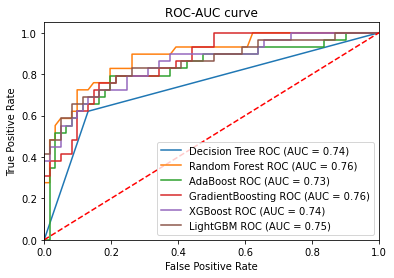

In [ ]:
test_models_plot_roc_auc_curve(list_models,
                              "model_name",
                              "estimator",
                              X_train,
                              X_test,
                              y_train,
                              y_test)

## 

## Exercícios

__1)__ Realize uma classificação com da coluna y dos dados de marketing bancário (contido no arquivo `bank-full.csv`) utilizando mais de um modelo dentro dos modelos conhecidos por vocês. Qual o melhor modelo a ser implementado?

__2)__ Com os dados do arquivo `Admission_Predict.csv` realize uma classificação dos alunos que possuem chance maior que 0.8 de admissão e dos que possuem chance menor que 0.8. Compare diversos modelos e determine qual seria o melhor a ser implementado.

## 